In [196]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import datetime as dt                 # check today's date 
import sys                            # check Python version 
import numpy as np

# IPython command, puts plots in notebook 
%matplotlib inline

print('Today is', dt.date.today())
print('Python version:\n', sys.version, sep='') ## Question 0

Today is 2017-12-21
Python version:
3.6.2 |Anaconda, Inc.| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [197]:
url = 'https://github.com/chrisc617/Data-Bootcamp-Final-Project/raw/master/scores.csv'
sat = pd.read_csv(url, sep=',')
print(sat.shape)
sat.head()
sat.columns=[i.lower() for i in sat.columns]
sat.drop(sat[['city','building code','state','phone number','start time','end time','student enrollment','percent tested']],axis=1)
sat = sat.drop(sat[['city','building code','state','phone number','start time','end time','student enrollment','percent tested']],axis=1)

(435, 22)


In [198]:
sat_m = sat[sat['borough']=='Manhattan']
print(sat_m.shape)
sat_m.dropna()
sat_m = sat_m.dropna()
sat_m.drop_duplicates(['school id'])
sat_m = sat_m.drop_duplicates(['school id'])
print(sat_m.shape)
sat_m['zip code'] = sat_m['zip code'].astype(str)
print(sat_m.dtypes)
sat_m.head()

(106, 14)
(89, 14)
school id                       object
school name                     object
borough                         object
street address                  object
zip code                        object
latitude                       float64
longitude                      float64
percent white                   object
percent black                   object
percent hispanic                object
percent asian                   object
average score (sat math)       float64
average score (sat reading)    float64
average score (sat writing)    float64
dtype: object


,school id,school name,borough,street address,zip code,latitude,longitude,percent white,percent black,percent hispanic,percent asian,average score (sat math),average score (sat reading),average score (sat writing)
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,111 Columbia Street,10002,40.71873,-73.97943,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0
3,02M294,Essex Street Academy,Manhattan,350 Grand Street,10002,40.71687,-73.98953,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0
4,02M308,Lower Manhattan Arts Academy,Manhattan,350 Grand Street,10002,40.71687,-73.98953,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0
5,02M545,High School for Dual Language and Asian Studies,Manhattan,350 Grand Street,10002,40.71687,-73.98953,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0
6,01M292,Henry Street School for International Studies,Manhattan,220 Henry Street,10002,40.71376,-73.98526,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0


In [363]:
import folium

sat_m['latitude']
lat1=(sat_m['latitude'][2])
lon1=(sat_m['longitude'][2])

sat_m_geo=sat_m[['latitude','longitude']]
sat_m_geo.head()

map_sat_m = folium.Map(location=[lat1,lon1], zoom_start=12)
for lat, lon in zip(sat_m_geo.latitude, sat_m_geo.longitude):
    folium.Marker(location=[lat,lon]).add_to(map_sat_m)

map_sat_m

In [200]:
sat_m = sat_m.rename(columns = {'average score (sat math)':'math','average score (sat reading)':'reading','average score (sat writing)':'writing'})
sat_m['average score overall'] = sat_m['math'] + sat_m['reading'] + sat_m['writing']
sat_m.sort_values('average score overall',ascending=False).head()

,school id,school name,borough,street address,zip code,latitude,longitude,percent white,percent black,percent hispanic,percent asian,math,reading,writing,average score overall
105,02M475,Stuyvesant High School,Manhattan,345 Chambers Street,10282,40.71775,-74.01405,20.4%,0.8%,2.6%,73.4%,754.0,697.0,693.0,2144.0
7,01M696,Bard High School Early College,Manhattan,525 East Houston Street,10002,40.71896,-73.97607,45.3%,17.2%,18.7%,17.1%,634.0,641.0,639.0,1914.0
80,05M692,"High School for Mathematics, Science, and Engi...",Manhattan,240 Convent Avenue,10031,40.82112,-73.94885,26.8%,9.6%,21.7%,38.5%,683.0,610.0,596.0,1889.0
55,02M416,Eleanor Roosevelt High School,Manhattan,411 East 76th Street,10021,40.77012,-73.95338,61.4%,4.4%,10.9%,20.1%,641.0,617.0,631.0,1889.0
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,111 Columbia Street,10002,40.71873,-73.97943,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,1859.0


In [164]:
# sat_m['race']=='1'
# for i in sat_m: 
#     if 'percent white' > 'percent black' and 'percent white' > 'percent hispanic' and 'percent white > percent asian':
#         sat_m['race']=='w'

# # (sat_m['Units'] == 'National currency') & (small['2011'] >= 100)
# # # sat_m.dtypes
# sat_m_w = sat_m[sat_m['race'] == 'w']
# sat_m_w

In [201]:
sat_m.head()

,school id,school name,borough,street address,zip code,latitude,longitude,percent white,percent black,percent hispanic,percent asian,math,reading,writing,average score overall
2,01M539,"New Explorations into Science, Technology and ...",Manhattan,111 Columbia Street,10002,40.71873,-73.97943,28.6%,13.3%,18.0%,38.5%,657.0,601.0,601.0,1859.0
3,02M294,Essex Street Academy,Manhattan,350 Grand Street,10002,40.71687,-73.98953,11.7%,38.5%,41.3%,5.9%,395.0,411.0,387.0,1193.0
4,02M308,Lower Manhattan Arts Academy,Manhattan,350 Grand Street,10002,40.71687,-73.98953,3.1%,28.2%,56.9%,8.6%,418.0,428.0,415.0,1261.0
5,02M545,High School for Dual Language and Asian Studies,Manhattan,350 Grand Street,10002,40.71687,-73.98953,1.7%,3.1%,5.5%,88.9%,613.0,453.0,463.0,1529.0
6,01M292,Henry Street School for International Studies,Manhattan,220 Henry Street,10002,40.71376,-73.98526,3.9%,24.4%,56.6%,13.2%,410.0,406.0,381.0,1197.0


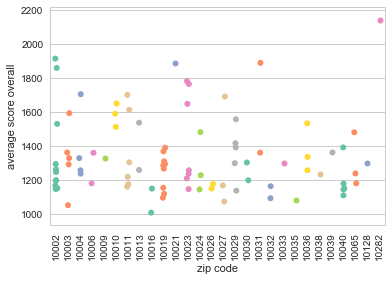

In [202]:
import seaborn as sns
sns.set_style('whitegrid')
ax = sns.stripplot(x='zip code', y='average score overall',
                  data=sat_m, jitter=True,
                  palette='Set2', dodge=True, size=6)
for i in ax.get_xticklabels():
    i.set_rotation(90)

1100000.0     96
750000.0      85
1300000.0     77
850000.0      75
550000.0      70
1200000.0     70
1150000.0     69
1250000.0     69
600000.0      62
800000.0      61
900000.0      61
700000.0      61
950000.0      61
1400000.0     59
1600000.0     59
1750000.0     57
650000.0      56
450000.0      56
2200000.0     55
775000.0      55
2000000.0     52
1050000.0     52
625000.0      50
2100000.0     50
1800000.0     50
675000.0      50
875000.0      49
1500000.0     49
1700000.0     49
1650000.0     48
              ..
6260000.0      1
3645000.0      1
8811862.0      1
4926802.0      1
2399801.0      1
763787.0       1
1396500.0      1
24441054.0     1
472000.0       1
731000.0       1
1199849.0      1
2399685.0      1
591857.0       1
1527500.0      1
414635.0       1
2388000.0      1
1461799.0      1
12629300.0     1
496546.0       1
1789564.0      1
616250.0       1
91366.0        1
4274558.0      1
1822300.0      1
2494712.0      1
818000.0       1
1527364.0      1
2464902.0     

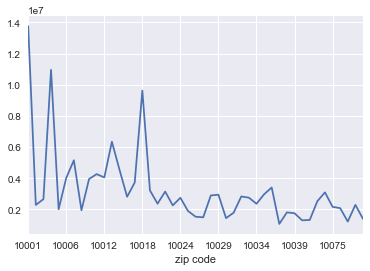

In [354]:
sat1=sat_m[['school id','zip code','average score overall']]
sales1=sales[['address','zip code','sale price','neighborhood']]
sales1.groupby('zip code')['sale price'].mean().plot()
sales1['sale price'].value_counts()

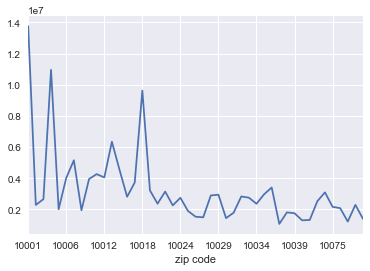

In [347]:
sales1[sales1['sale price']<=1000000000].groupby('zip code')['sale price'].mean().plot()

In [348]:
sat1['count']=1
sales1['count']=1
sat2=sat1.groupby(['zip code'],as_index=False).agg({'average score overall':np.mean,'count':len}).round(2)
sales2=sales1[sales1['sale price']<=1000000000].groupby(['zip code'],as_index=False).agg({'sale price':np.mean,'count':len}).round(2)
# sales3=sales2[sales2['sale price']>10].groupby(['zip code'],as_index=False).agg({'sale price':np.mean,'count':len}).round(2)

/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/apple/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [349]:
combo = pd.merge(sat2,sales2, how='left', left_on = 'zip code', right_on = 'zip code')
combo.rename(columns={'average score overall': 'average_score','sale price':'sale_price'}, inplace=True)
combo

,zip code,average_score,count_x,sale_price,count_y
0,10002,1358.91,11,2293384.18,251
1,10003,1323.60,5,2663026.84,581
2,10004,1380.25,4,10963650.05,73
3,10006,1268.00,2,4026106.15,176
4,10009,1327.00,1,1949817.99,170
5,10010,1583.00,3,3956661.32,437
6,10011,1360.17,6,4270122.94,893
7,10013,1396.50,2,6349208.42,499
8,10016,1076.00,2,2817185.51,804
9,10019,1251.67,9,3225926.17,654


In [339]:
print(combo[['average_score','sale_price']].corr())
import statsmodels.formula.api as smf
print(smf.ols('sale_price ~ average_score' ,data=combo).fit().summary())

               average_score  sale_price
average_score         1.0000      0.0314
sale_price            0.0314      1.0000
                            OLS Regression Results                            
Dep. Variable:             sale_price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.037
Method:                 Least Squares   F-statistic:                   0.02566
Date:                Thu, 21 Dec 2017   Prob (F-statistic):              0.874
Time:                        12:14:06   Log-Likelihood:                -443.93
No. Observations:                  28   AIC:                             891.9
Df Residuals:                      26   BIC:                             894.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----

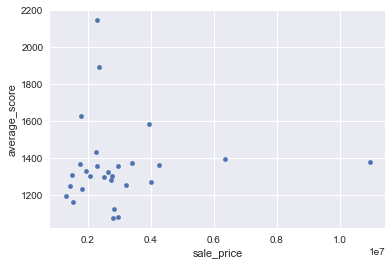

In [340]:
combo.plot(kind='scatter',x='sale_price', y='average_score')

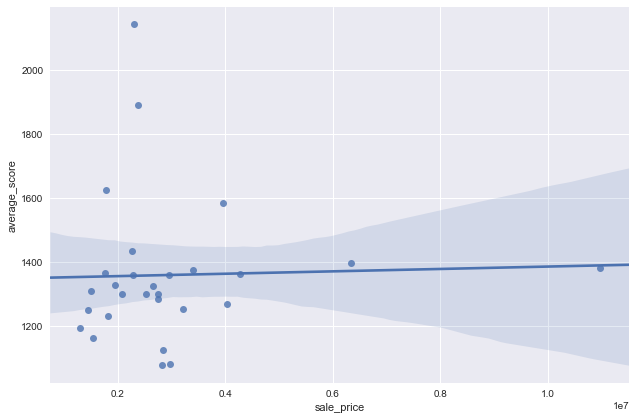

In [341]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.lmplot(x='sale_price', y='average_score', data=combo, 
                scatter=True, 
                palette='Red', 
                size = 6,
                aspect = 1.5)

In [353]:
url = 'https://raw.githubusercontent.com/chrisc617/Data-Bootcamp-Final-Project/master/rollingsales_manhattan%20Clean.csv'
sales = pd.read_csv(url, sep=',')
print(sales.shape)
sales.columns=[i.strip().lower() for i in sales.columns]
sales = sales.drop(sales[['block','lot','ease-ment','building class at present','tax class at time of sale','building class at time of sale']],axis=1)
sales.head()
sales['sale price'].value_counts(dropna=False)
sales['sale price'] = sales['sale price'].replace(to_replace=[' -   '], value=[None])
sales['sale price'].value_counts(dropna=False)
sales=sales.dropna()
# sales['sale price'].value_counts(dropna=False)
# print(sales.shape)
# sales['land square feet'].value_counts(dropna=False)
# sales['land square feet'] = sales['land square feet'].replace(to_replace=[' -   '], value=[None])
# sales['land square feet'] = sales['land square feet'].replace(to_replace=['           . '], value=[None])
# sales['land square feet'].value_counts(dropna=False)
# sales=sales.dropna()
# sales['land square feet'].value_counts(dropna=False)
print(sales.shape)
sales.head()
sales[['zip code','borough']] = sales[['zip code','borough']].astype(str)
sales['sale price'] = sales['sale price'].apply(lambda x: x.replace(',',''))
# sales['land square feet'] = sales['land square feet'].apply(lambda x: x.replace(',',''))
sales.head()
# sales[['sale price','land square feet']] = sales[['sale price','land square feet']].astype(float)
sales[['sale price']] = sales[['sale price']].astype(float)
sales.head()

sales=sales[sales['sale price']>100]
sales=sales[sales['sale price']<=1000000000]
sales.sort_values('sale price',ascending=False).head()
# result[result['Value'] > 10] 

(18066, 21)
(14401, 15)


,borough,neighborhood,building class category,tax class at present,address,apartment number,zip code,residential units,commercial units,total units,land square feet,gross square feet,year built,sale price,sale date
2535,1,FINANCIAL,21 OFFICE BUILDINGS,4,85 BROAD STREET,,10004,0,1,1,"42,762","993,570",1983,652000000.0,5/24/2017
6171,1,KIPS BAY,08 RENTALS - ELEVATOR APARTMENTS,2,460-520 2ND AVENUE,,10016,894,8,902,"141,836","829,024",1975,620000000.0,12/8/2016
2012,1,FASHION,21 OFFICE BUILDINGS,4,1250 BROADWAY,,10001,0,55,55,"30,750","645,977",1969,565000000.0,11/1/2016
8553,1,MIDTOWN EAST,21 OFFICE BUILDINGS,4,685 3 AVENUE,,10017,0,57,57,"31,129","559,755",1960,467500000.0,10/11/2017
952,1,CHELSEA,21 OFFICE BUILDINGS,4,249 WEST 17TH STREET,,10011,0,1,1,"17,790","108,768",1902,339400000.0,10/11/2017
